<a href="https://colab.research.google.com/github/Cathidumi/fmi_ufpa/blob/main/Substituindo_Vazios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
dados = pd.read_csv('dados_new2.csv')

#Calculando a média

In [ ]:
def filtro_selecao(i):
  if i == 0:
    selecao = (dados['TEM_INS'].isnull() == True) & (dados['UMD_INS'].isnull() == True) & (dados['VEN_VEL'].isnull() == True)& (dados['HR_MED'] == Hora)
  elif i == 1:
    selecao = (dados['TEM_INS'].isnull() == True) & (dados['UMD_INS'].isnull() == True) & (dados['VEN_VEL'].isnull() == False) & (dados['HR_MED'] == Hora)
  elif i == 2:
    selecao = (dados['TEM_INS'].isnull() == False) & (dados['UMD_INS'].isnull() == True) & (dados['VEN_VEL'].isnull() == True)& (dados['HR_MED'] == Hora)
  elif i == 3:
    selecao = (dados['TEM_INS'].isnull() == True) & (dados['UMD_INS'].isnull() == False) & (dados['VEN_VEL'].isnull() == True)& (dados['HR_MED'] == Hora)
  elif i == 4:
    selecao = (dados['TEM_INS'].isnull() == True) & (dados['UMD_INS'].isnull() == False) & (dados['VEN_VEL'].isnull() == False)& (dados['HR_MED'] == Hora)
  elif i == 5:
    selecao = (dados['TEM_INS'].isnull() == False) & (dados['UMD_INS'].isnull() == True) & (dados['VEN_VEL'].isnull() == False) & (dados['HR_MED'] == Hora)
  elif i == 6:
    selecao = (dados['TEM_INS'].isnull() == False) & (dados['UMD_INS'].isnull() == False) & (dados['VEN_VEL'].isnull() == True) & (dados['HR_MED'] == Hora)
    
  return selecao

In [ ]:
def Consertando_todos(Hora):
    magic_number1 = dados[(dados['HR_MED'] == Hora)]['TEM_INS'].mean()
    magic_number2 = dados[(dados['HR_MED'] == Hora)]['UMD_INS'].mean()
    magic_number3 = dados[(dados['HR_MED'] == Hora)]['VEN_VEL'].mean()
    media = list()
    
    for i in range(0, 7):
      selecao = filtro_selecao(i)
      ax1 = dados[selecao]
      ax1[['TEM_INS']] = ax1[['TEM_INS']].fillna(magic_number1)
      ax1[['UMD_INS']] = ax1[['UMD_INS']].fillna(magic_number2)
      ax1[['VEN_VEL']] = ax1[['VEN_VEL']].fillna(magic_number3)
      media.append(ax1)
    return media

In [ ]:
k = list()
for Hora in range (0, 2400, 100):
  k.append(Consertando_todos(Hora))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
dados.dropna(inplace = True)

#Substituindo

In [ ]:
dados_new = pd.DataFrame()
for i in range(0, 24):
  for j in range(0, 7):
    dados_new = pd.concat([dados_new, k[i][j]])
dados_new = pd.concat([dados_new, dados])

In [ ]:
dados_new.sort_index(inplace=True)

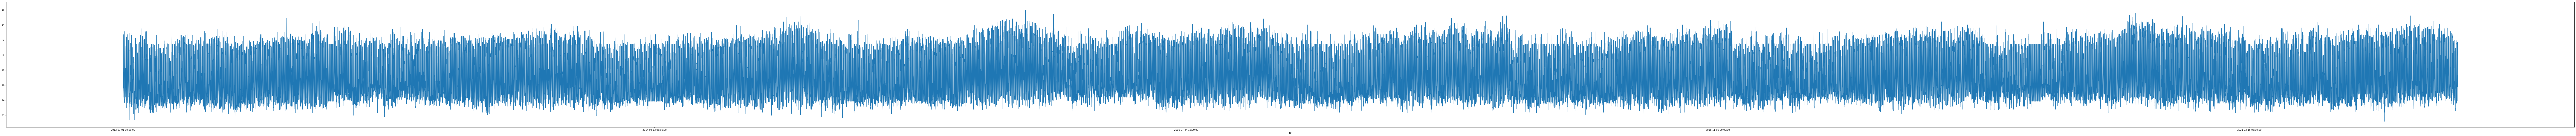

In [ ]:
dados_new['TEM_INS'].plot(figsize=(200, 10))

In [ ]:
#dados_new['UMD_INS'].plot(figsize=(200, 10))

In [ ]:
#dados_new['VEN_VEL'].plot(figsize=(200, 10))

#Arrumando index

In [ ]:
dados_new.set_index('INS', inplace=True)
dados_new.pop('HORA')
dados_new.head()

,DAT_MED,HR_MED,TEM_INS,VEN_VEL,UMD_INS
INS,,,,,
2012-01-01 00:00:00,01/01/2012,0,26.6,1.1,81.0
2012-01-01 01:00:00,01/01/2012,100,26.3,0.8,81.0
2012-01-01 02:00:00,01/01/2012,200,26.2,0.7,82.0
2012-01-01 03:00:00,01/01/2012,300,26.0,0.2,83.0
2012-01-01 04:00:00,01/01/2012,400,25.6,0.7,85.0


#Exportando dados

In [ ]:
dados_new.to_csv('dados_new3.csv', index = True)

In [ ]:
df = pd.read_csv('dados_new3.csv')
df

,INS,HORA,TEM_INS,VEN_VEL,UMD_INS
0,2012-01-01 00:00:00,0,26.6,1.1,81.0
1,2012-01-01 01:00:00,1,26.3,0.8,81.0
2,2012-01-01 02:00:00,2,26.2,0.7,82.0
3,2012-01-01 03:00:00,3,26.0,0.2,83.0
4,2012-01-01 04:00:00,4,25.6,0.7,85.0
...,...,...,...,...,...
87835,2022-01-07 19:00:00,19,27.2,0.2,83.0
87836,2022-01-07 20:00:00,20,26.8,0.6,86.0
87837,2022-01-07 21:00:00,21,26.7,0.9,87.0
87838,2022-01-07 22:00:00,22,26.1,1.4,90.0
